# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [18]:
# Q1 (code)
!pip install tomotopy
!pip install little-mallet-wrapper
!pip install tweet-preprocessor


  Obtaining dependency information for tweet-preprocessor from https://files.pythonhosted.org/packages/17/9d/71bd016a9edcef8860c607e531f30bd09b13103c7951ae73dd2bf174163c/tweet_preprocessor-0.6.0-py3-none-any.whl.metadata


In [1]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [2]:
# Q2 (code)
# Load the datasets
sanders_tweets_df = pd.read_csv('sanders_tweets.csv')
trump_tweets_df = pd.read_csv('trump_tweets.csv')

# Concatenate the datasets
combined_df = pd.concat([sanders_tweets_df, trump_tweets_df])

# Reset index
combined_df.reset_index(drop=True, inplace=True)

# Display the combined dataset
print(combined_df.head())


     Username              TweetId                           Title  \
0  SenSanders  1351670845639421952  SenSanders_1351670845639421952   
1  SenSanders  1351259762722279424  SenSanders_1351259762722279424   
2  SenSanders  1351242822293319680  SenSanders_1351242822293319680   
3  SenSanders  1350885541911400448  SenSanders_1350885541911400448   
4  SenSanders  1349880150041780224  SenSanders_1349880150041780224   

                                             Content  
0  Wealth increase in past 10 months:\n⬆️$173 bil...  
1  Amidst massive income and wealth inequality te...  
2  “We now have the resources, we now have the sk...  
3  After surviving an attempt on his life, Russia...  
4  President-Elect Biden's COVID rescue plan will...  


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [7]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('stopwords')

# Initialize stopwords
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    # Convert to lowercase
    cleaned_text = text.lower()

    # Remove all punctuation
    cleaned_text = re.sub(r'[^\w\s]', ' ', cleaned_text)

    # Remove all numbers
    cleaned_text = re.sub(r'\d+', '', cleaned_text)

    # Tokenize the text
    tokens = nltk.word_tokenize(cleaned_text)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Remove 'rt' and 'amp'
    filtered_tokens = [word for word in filtered_tokens if word not in ['rt', 'amp','co']]

    # Remove links and Twitter usernames
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t.co\/|\@\w+|realdonaldtrump", '', ' '.join(filtered_tokens), flags=re.MULTILINE)

    return processed_text
# Apply a text processing function to the "Content" column
combined_df['Processed_Text'] = combined_df['Content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\70794\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
training_data = combined_df['Processed_Text'].tolist()
original_texts = combined_df['Content'].tolist()
titles = list(zip(combined_df['Username'], combined_df['Title']))

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [43]:
# Q4 (code)

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -9.618020690547027
Iteration: 10	Log-likelihood: -9.218506762017693
Iteration: 20	Log-likelihood: -9.042196531674842
Iteration: 30	Log-likelihood: -8.943681055646815
Iteration: 40	Log-likelihood: -8.883382784480078
Iteration: 50	Log-likelihood: -8.840881226772636
Iteration: 60	Log-likelihood: -8.810988608391398
Iteration: 70	Log-likelihood: -8.784198670591213
Iteration: 80	Log-likelihood: -8.767132229089421
Iteration: 90	Log-likelihood: -8.751043431304648


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [44]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

states united china u deal trade great many much would

✨Topic 1✨

tonight foxnews trump p president live news watch thank join

✨Topic 2✨

democrats house impeachment senate pelosi nothing dems republicans nancy president

✨Topic 3✨

great thank north korea forward president today white house carolina

✨Topic 4✨

thank president whitehouse com great twitter today ä day status

✨Topic 5✨

news fake media even joe biden never people like would

✨Topic 6✨

health care people must need americans right medicare million security

✨Topic 7✨

people trump vote court election must american republicans country want

✨Topic 8✨

american america president people country trump change together must today

✨Topic 9✨

border wall must war security end congress immigration law trump

✨Topic 10✨

workers tax jobs billion pay wage million americans companies people

✨Topic 11✨

great vote state total military big endorsement strong complete governor

✨Topic 12✨

new gr

# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?


- Topic 0: This seems to be about international relations, specifically between the United States and China. It seems to focus on trade deals.
- Topic 1: This appears to be about President Trump and his appearances on Fox News.
- Topic 2: This topic likely refers to impeachment proceedings against President Trump, and mentions key figures such as Nancy Pelosi.
- Topic 3: This topic seems to be about diplomatic relations between North Korea and the United States, and mentions the White House.
- Topic 4: This topic likely refers to President Trump's online presence, mentioning Twitter and the White House.
- Topic 5: This topic seems to be about media bias and mentions the term "fake news". It also refers to Joe Biden.
- Topic 6: This topic is likely about healthcare, including Medicare and social security.
- Topic 7: This topic seems to be about the importance of voting, and mentions the court and the election.
- Topic 8: This topic seems to be about American identity and the notion of change.
- Topic 9: This topic appears to be about border security and immigration policies, mentioning the wall.
- Topic 10: This topic likely refers to the economy, specifically jobs, wages and taxes.
- Topic 11: This topic seems to be about military endorsement for political figures, mentioning voting and the state governor.
- Topic 12: This topic likely refers to the state of the economy under President Trump's administration, mentioning jobs and economic records.
- Topic 13: This topic appears to be about the investigation into Russian interference in the 2016 election, mentioning key figures and terms such as the FBI, Mueller, and "witch hunt".
- Topic 14: This topic seems to be about the impeachment inquiry, mentioning the whistleblower complaint and Joe Biden.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [45]:
# There are different metrics for coherence, we choose `c_v`

num_topics = 15
# 15 topics' result
coh15 = tp.coherence.Coherence(model, coherence='c_v')
average_coherence15 = coh15.get_score()
coherence_per_topic15 = [coh15.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 15 topics: {} ===='.format('c_v'))
print('Average:', average_coherence15, '\nPer Topic:', coherence_per_topic15)
print()

==== Coherence 15 topics: c_v ====
Average: 0.5995011894901593 
Per Topic: [0.5867369413375855, 0.5337166801095009, 0.6513289183378219, 0.5207380264997482, 0.5643116556107998, 0.5887045405805111, 0.680253854393959, 0.46354700028896334, 0.49235284328460693, 0.5533875748515129, 0.7134511649608613, 0.7161837726831436, 0.5014949828386307, 0.7791299700737, 0.6471799165010452]



In [47]:

num_topics = 5

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 5 topics' result
coh5 = tp.coherence.Coherence(model, coherence='c_v')
average_coherence5 = coh5.get_score()
coherence_per_topic5 = [coh5.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 5 topics: {} ===='.format('c_v'))
print('Average:', average_coherence5, '\nPer Topic:', coherence_per_topic5)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.268033796103918
Iteration: 10	Log-likelihood: -9.009527313597339
Iteration: 20	Log-likelihood: -8.868271503522763
Iteration: 30	Log-likelihood: -8.807878768505452
Iteration: 40	Log-likelihood: -8.774474241702313
Iteration: 50	Log-likelihood: -8.754700836121014
Iteration: 60	Log-likelihood: -8.74077823166572
Iteration: 70	Log-likelihood: -8.72866240205071
Iteration: 80	Log-likelihood: -8.718492188300141
Iteration: 90	Log-likelihood: -8.712656017287742
==== Coherence 5 topics: c_v ====
Average: 0.501432141661644 
Per Topic: [0.39448611736297606, 0.559775459766388, 0.42737895250320435, 0.5486102312803268, 0.5769099473953248]



In [52]:

num_topics = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 5 topics' result
coh10 = tp.coherence.Coherence(model, coherence='c_v')
average_coherence10 = coh10.get_score()
coherence_per_topic10 = [coh10.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 10 topics: {} ===='.format('c_v'))
print('Average:', average_coherence10, '\nPer Topic:', coherence_per_topic10)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.498700143363816
Iteration: 10	Log-likelihood: -9.15555337250525
Iteration: 20	Log-likelihood: -8.997007944250429
Iteration: 30	Log-likelihood: -8.908982328072469
Iteration: 40	Log-likelihood: -8.855123417119987
Iteration: 50	Log-likelihood: -8.816174315269187
Iteration: 60	Log-likelihood: -8.787270333468769
Iteration: 70	Log-likelihood: -8.7674109442107
Iteration: 80	Log-likelihood: -8.749898800323367
Iteration: 90	Log-likelihood: -8.733788081965749
==== Coherence 10 topics: c_v ====
Average: 0.5500191674381495 
Per Topic: [0.6007941901683808, 0.43641042038798333, 0.5684904456138611, 0.5447572946548462, 0.45458526313304903, 0.6501583337783814, 0.6346901208162308, 0.4829936295747757, 0.4902320489287376, 0.6370799273252488]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

# Q6 (words)
In the initial model, 15 topics were used, resulting in a coherence score of 0.5995. This suggests that there was a relatively high degree of semantic similarity among the top words in each topic, indicating good topic quality.

When the number of topics was reduced to 5, the coherence score dropped to 0.5014. This suggests that the model had a harder time distinguishing between the different topics, possibly because there were fewer topics to distribute the words among.

The number of topics was then increased to 10, and the coherence score increased slightly to 0.5500. This suggests that the model was better able to distinguish between the topics with a larger number of topics available, but still did not reach the coherence of the initial model with 15 topics.

These results suggest that the initial model with 15 topics provided the best balance between model complexity and topic quality, as measured by coherence score.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

In [50]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt

def plot_avg_coherence(num_topics_list, coherence_scores):

    # Plot average coherence
    plt.figure(figsize=(10, 6))
    plt.plot(num_topics_list, coherence_scores, marker='o')
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.xticks(num_topics_list)
    plt.grid(True)
    plt.show()


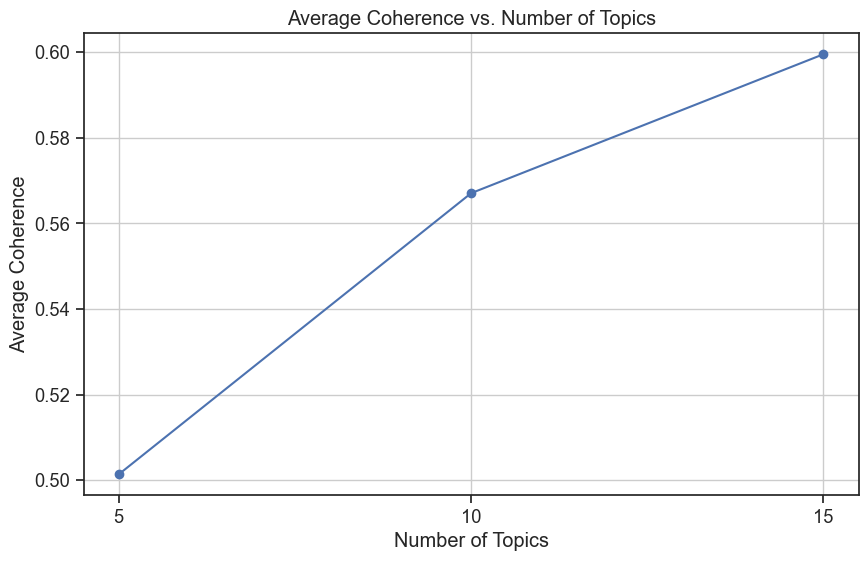

In [51]:
num_topics_list = [5, 10, 15]
coherence_scores = [0.501432141661644, 0.5670614880323409, 0.5995011894901593]

plot_avg_coherence(num_topics_list, coherence_scores)


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [53]:
# Q7a (code)
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
topic_distributions[32]

[0.007147781,
 0.005351933,
 0.011555602,
 0.004376991,
 0.004821971,
 0.0053350967,
 0.008151027,
 0.0068174615,
 0.34569588,
 0.6007463]

In [54]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [55]:
# Display 6 documents for topic 2
get_top_docs(topics, topic_distributions, topic_index=2, n=6)

### ✨Topic 2✨

democrats house impeachment senate pelosi nothing dems republicans nancy president



---


✨  
**Topic Probability**: 0.19674207270145416  
**Document**: **democrats** **house** **impeachment** **senate** **pelosi** **nothing** **dems** **republicans** **nancy** **president**



✨  
**Topic Probability**: 0.19674207270145416  
**Document**: american america **president** people country trump change together must today



✨  
**Topic Probability**: 0.17988386750221252  
**Document**: trump fbi russia collusion witch hunt mueller hillary clinton campaign



✨  
**Topic Probability**: 0.1276739090681076  
**Document**: new great economy trump ever **president** jobs record best years



✨  
**Topic Probability**: 0.07937846332788467  
**Document**: people trump vote court election must american **republicans** country want



✨  
**Topic Probability**: 0.049660712480545044  
**Document**: great thank north korea forward **president** today white **house** carolina



In [56]:
# Display 6 documents for topic 3
get_top_docs(topics, topic_distributions, topic_index=3, n=6)

### ✨Topic 3✨

great thank north korea forward president today white house carolina



---


✨  
**Topic Probability**: 0.18654300272464752  
**Document**: democrats **house** impeachment senate pelosi nothing dems republicans nancy **president**



✨  
**Topic Probability**: 0.038533005863428116  
**Document**: workers tax jobs billion pay wage million americans companies people



✨  
**Topic Probability**: 0.010735801421105862  
**Document**: border wall must war security end congress immigration law trump



✨  
**Topic Probability**: 0.008187079802155495  
**Document**: trump fbi russia collusion witch hunt mueller hillary clinton campaign



✨  
**Topic Probability**: 0.006218640133738518  
**Document**: american america **president** people country trump change together must **today**



✨  
**Topic Probability**: 0.005866043269634247  
**Document**: trump **president** biden schiff call joe ukraine whistleblower via read



In [57]:
# Display 6 documents for topic 4
get_top_docs(topics, topic_distributions, topic_index=4, n=6)

### ✨Topic 4✨

thank president whitehouse com great twitter today ä day status



---


✨  
**Topic Probability**: 0.40336236357688904  
**Document**: trump **president** biden schiff call joe ukraine whistleblower via read



✨  
**Topic Probability**: 0.16728873550891876  
**Document**: trump fbi russia collusion witch hunt mueller hillary clinton campaign



✨  
**Topic Probability**: 0.011827240698039532  
**Document**: border wall must war security end congress immigration law trump



✨  
**Topic Probability**: 0.006850848905742168  
**Document**: democrats house impeachment senate pelosi nothing dems republicans nancy **president**



✨  
**Topic Probability**: 0.006850848905742168  
**Document**: american america **president** people country trump change together must **today**



✨  
**Topic Probability**: 0.0058042085729539394  
**Document**: health care people must need americans right medicare million security



In [58]:
# Display 6 documents for topic 5
get_top_docs(topics, topic_distributions, topic_index=5, n=6)

### ✨Topic 5✨

news fake media even joe biden never people like would



---


✨  
**Topic Probability**: 0.07693050056695938  
**Document**: **news** **fake** **media** **even** **joe** **biden** **never** **people** **like** **would**



✨  
**Topic Probability**: 0.013085826300084591  
**Document**: border wall must war security end congress immigration law trump



✨  
**Topic Probability**: 0.009979198686778545  
**Document**: trump fbi russia collusion witch hunt mueller hillary clinton campaign



✨  
**Topic Probability**: 0.007579875644296408  
**Document**: democrats house impeachment senate pelosi nothing dems republicans nancy president



✨  
**Topic Probability**: 0.007579875644296408  
**Document**: american america president **people** country trump change together must today



✨  
**Topic Probability**: 0.007150096818804741  
**Document**: trump president **biden** schiff call **joe** ukraine whistleblower via read



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

# Q7b (words)
Interpreting the results, it appears that the topics generated are reflective of key issues and events that occurred during the politicians' respective terms.

For instance, Topic 2, which includes words like 'democrats', 'house', 'impeachment', 'senate', 'pelosi', 'dems', 'republicans', 'nancy', and 'president', is likely related to the impeachment proceedings against President Trump. The high probability scores for this topic on tweets from Trump suggest that this topic is more representative of Trump's views. This is likely because Trump frequently tweeted about his impeachment, thus making this topic more prominent in his tweets.

On the other hand, Topic 5, with words like 'news', 'fake', 'media', 'even', 'joe', 'biden', 'never', 'people', 'like', 'would', appears to revolve around the theme of media bias and 'fake news', a recurring theme in Trump's rhetoric. The high probability scores for this topic on tweets from Trump also suggest that this topic is more representative of his views.

It's important to note that the presence of a topic in a politician's tweets does not necessarily mean the politician endorses or agrees with that topic. They might be discussing it to criticize or refute it. Furthermore, the model's interpretation of topics is purely statistical and does not take into account the context or tone of the tweets.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [59]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

In [85]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

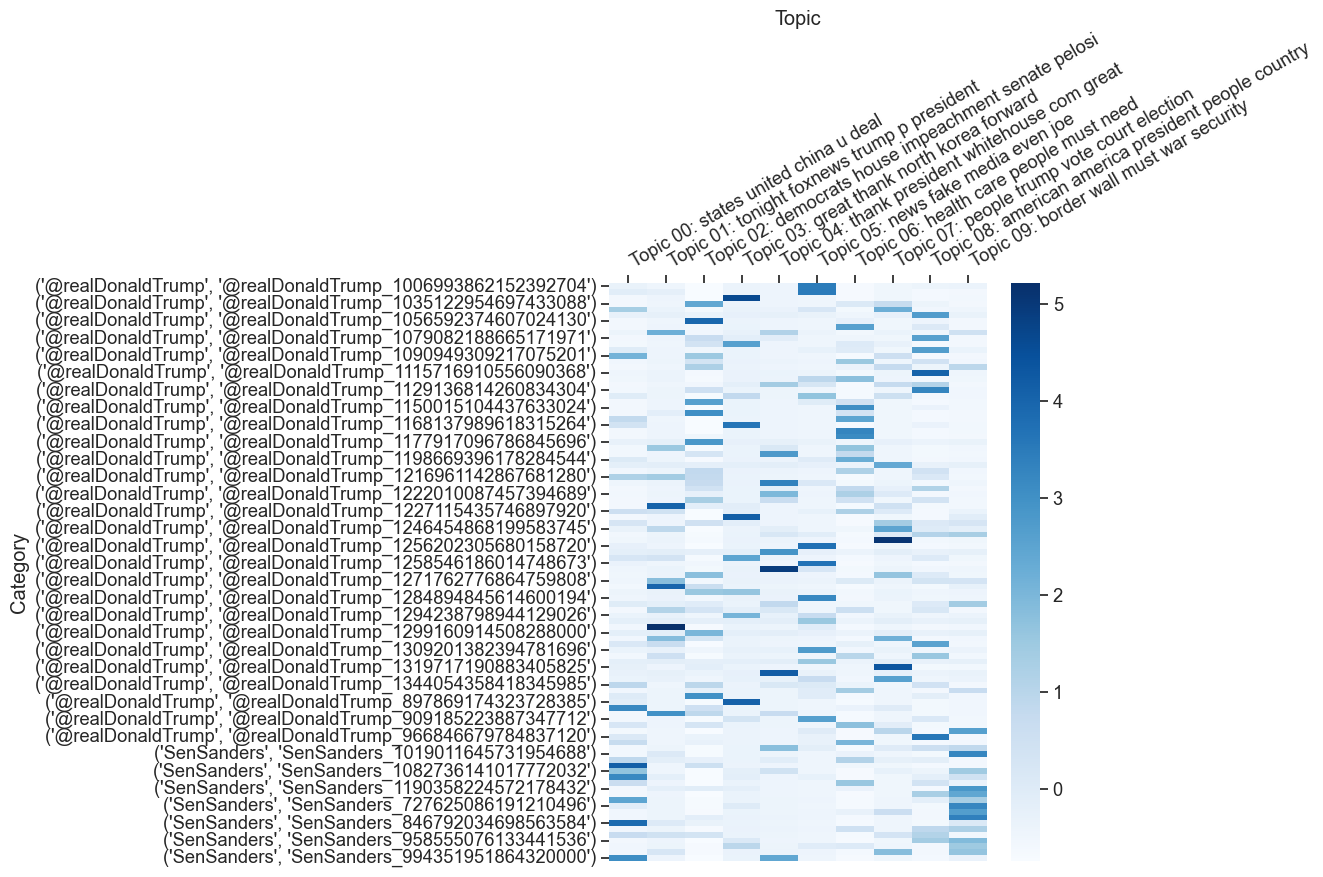

In [86]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(12,9))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

# Q9 (words)
We can identify distinct patterns in the probability distributions of the topics associated with each politician.
Topic 05, characterized by words such as 'news', 'fake', and 'media', demonstrates a higher probability when associated with @realDonaldTrump. This pattern aligns with Donald Trump's frequent use of the term "fake news" and his public criticisms of the media, which were a significant part of his public discourse throughout his presidency.
Conversely, Topic 06, featuring words like 'health', 'care', 'people', 'must', and 'need', shows a stronger association with SenSanders. This fits Bernie Sanders' political profile as he has consistently advocated for healthcare reform and the need to address the healthcare needs of the people, especially those who are underprivileged or marginalized.
These deeper patterns reflect the distinct political narratives and public personas each politician maintains, and the topics they prioritize in their public communication.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [84]:
# X2 (code)

# Filter tweets by Trump and Sanders
trump_tweets = combined_df[combined_df['Username'] == '@realDonaldTrump'].sample(50, random_state=42)
sanders_tweets = combined_df[combined_df['Username'] == 'SenSanders'].sample(50, random_state=42)

# Concatenate the balanced samples
balanced_sample = pd.concat([trump_tweets, sanders_tweets])

# Shuffle the balanced sample
balanced_sample = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_sample

,Username,TweetId,Title,Content,Processed_Text
0,SenSanders,1093573599980634112,SenSanders_1093573599980634112,"Mr. Trump, you are dead wrong. This is not a ""...",mr trump dead wrong hot economy percent jobs a...
1,SenSanders,949398409676558336,SenSanders_949398409676558336,This is a health crisis that no one is talking...,health crisis one talking congress act soon fu...
2,SenSanders,1067152462493159424,SenSanders_1067152462493159424,The fact that we have a President of the Unite...,fact president united states believe science i...
3,@realDonaldTrump,1087200167802163200,@realDonaldTrump_1087200167802163200,Curt Schilling deserves to be in the Baseball...,curt schilling deserves baseball hall fame gre...
4,@realDonaldTrump,1313832140287750145,@realDonaldTrump_1313832140287750145,"RT @dbongino: It’s Wednesday, October 7th 202...",dbongino wednesday october th barack obama def...
...,...,...,...,...,...
95,SenSanders,1143187172125761536,SenSanders_1143187172125761536,My colleagues @RepJayapal and @Ilhan are joini...,colleagues repjayapal ilhan joining answer que...
96,SenSanders,893499521627561984,SenSanders_893499521627561984,Vermont's Green Mountain Power continues to le...,vermont green mountain power continues lead wa...
97,@realDonaldTrump,963031666150313984,@realDonaldTrump_963031666150313984,This will be a big week for Infrastructure. A...,big week infrastructure stupidly spending tril...
98,SenSanders,1004750647445647360,SenSanders_1004750647445647360,I believe that we have become far too comforta...,believe become far comfortable united states e...


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)